In [2]:
from numpy import matrix
from numpy import ones
from numpy import shape

In [3]:
def loadSimpleData():
    dataMat = matrix([[1.,2.1],[2.,1.1],[1.3,1.],[1.,1.],[2.,1.],])
    classLabels = [1.0,1.0,-1.0,-1.0,1.0]
    return dataMat, classLabels

In [4]:
datMat , classLabels = loadSimpleData()

In [5]:
datMat

matrix([[ 1. ,  2.1],
        [ 2. ,  1.1],
        [ 1.3,  1. ],
        [ 1. ,  1. ],
        [ 2. ,  1. ]])

In [6]:
classLabels

[1.0, 1.0, -1.0, -1.0, 1.0]

In [7]:
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    retArray = ones((shape(dataMatrix)[0],1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0
    return retArray

In [8]:
stumpClassify(datMat,0,1.5,'lddt')

array([[ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.]])

In [9]:
datMat

matrix([[ 1. ,  2.1],
        [ 2. ,  1.1],
        [ 1.3,  1. ],
        [ 1. ,  1. ],
        [ 2. ,  1. ]])

In [10]:
datMat.shape

(5, 2)

In [11]:
from numpy import mat

In [12]:
D = mat(ones((5,1))/5)

In [13]:
D

matrix([[ 0.2],
        [ 0.2],
        [ 0.2],
        [ 0.2],
        [ 0.2]])

In [14]:
from numpy import zeros
from numpy import inf

In [104]:
def buildStump(dataArr, classLabels, D):
    dataMatrix = mat(datMat);
    labelMat = mat(classLabels).T
    m,n =shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = mat(zeros((m,1)))
    minError = inf
    for i in range(n):
        rangeMin = dataMatrix[:,i].min();rangeMax = dataMatrix[:,i].max();
        StepSize = (rangeMax-rangeMin)/numSteps
        for j in range(-1,int(numSteps)+1):
            for inequal in ['lt','gt']:
                threshVal = rangeMin +float(j)*StepSize
                predictedVals = stumpClassify(dataMatrix,i,threshVal,inequal)
                errArr = mat(ones((m,1)))                                          
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T * errArr
                #print('split:dim %d, thresh %.2f, thresh ineneqal: %s the weighted error is %.3f'%\
                     #(i,threshVal,inequal,weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClassEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
                    #print(bestStump,minError)
    return bestStump, minError, bestClassEst

In [105]:
buildStump(datMat,classLabels,D)

({'dim': 0, 'ineq': 'lt', 'thresh': 1.3},
 matrix([[ 0.16666667]]),
 array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [26]:
from numpy import exp,log

import numpy as np
import matplotlib.pyplot as plt

In [43]:
X =np.linspace(0,1,1000)

In [44]:
Y = 0.5*log((1-X)/X)

/home/xu/venv/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/xu/venv/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [54]:
A = plt.plot(X,Y,'-')

In [55]:
plt.grid(True)

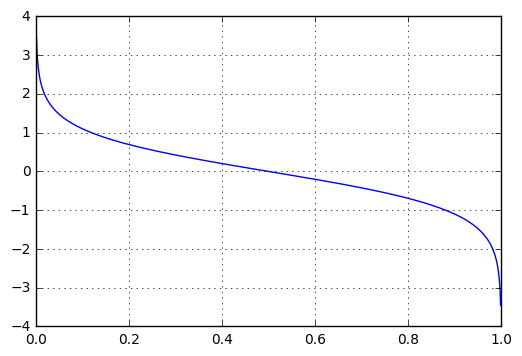

In [56]:
plt.show()

In [21]:
pwd

'/home/xu/learnProject/mlinAction'

In [90]:
sign?

In [89]:
from numpy import multiply,sign

In [131]:
def addBoostTrainDS(dataMat,classLabels,numIt=40):
    weakClassErr = []
    m = shape(datMat)[0]
    D = mat(ones((m,1))/m)
    aggClassEst = mat(zeros((m,1)))
    for i in range(9):
        bestStump, error, classEst = buildStump(datMat,classLabels,D)
        print('D:',D.T)
        alpha = float(0.5*log((1-error)/max(error,1e-16)))
        bestStump['alpha'] = alpha
        weakClassErr.append(bestStump)
        print("classEst: ", classEst.T)
        expon = multiply(-1*alpha*mat(classLabels).T,classEst)
        D = multiply(D,exp(expon))
        D = D/D.sum()
        aggClassEst += alpha*classEst
        print('aggClassEst: ',aggClassEst.T)
        aggError = multiply(sign(aggClassEst) != mat(classLabels).T,ones((m,1)))
        errorRate = aggError.sum()/m
        print("total error: ",errorRate,'\n')
        if errorRate == 0.0:
            break
    return weakClassErr


In [119]:
conda

matrix([[ True],
        [ True],
        [ True],
        [ True],
        [ True]], dtype=bool)

In [122]:
condaF = sign(aggClassEst) != mat(classLabels).T

In [113]:
ones((m,1))

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [124]:
multiply(condaF,mat([3,3,3,3,3]).T)

matrix([[0],
        [0],
        [0],
        [0],
        [0]])

In [132]:
classifierArr = addBoostTrainDS(datMat,classLabels,9)

D: [[ 0.2  0.2  0.2  0.2  0.2]]
classEst:  [[-1.  1. -1. -1.  1.]]
aggClassEst:  [[-0.69314718  0.69314718 -0.69314718 -0.69314718  0.69314718]]
total error:  0.2 

D: [[ 0.5    0.125  0.125  0.125  0.125]]
classEst:  [[ 1.  1. -1. -1. -1.]]
aggClassEst:  [[ 0.27980789  1.66610226 -1.66610226 -1.66610226 -0.27980789]]
total error:  0.2 

D: [[ 0.28571429  0.07142857  0.07142857  0.07142857  0.5       ]]
classEst:  [[ 1.  1.  1.  1.  1.]]
aggClassEst:  [[ 1.17568763  2.56198199 -0.77022252 -0.77022252  0.61607184]]
total error:  0.0 



In [134]:
from pandas import DataFrame

In [135]:
DataFrame(classifierArr)

,alpha,dim,ineq,thresh
0,0.693147,0,lt,1.3
1,0.972955,1,lt,1.0
2,0.895880,0,lt,0.9


In [137]:
def adaClassify(datToClass,classifierArr):
    dataMatrix = mat(datToClass)
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix,classifierArr[i]['dim'],classifierArr[i]['thresh'],classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return sign(aggClassEst)

In [140]:
adaClassify([[0,0],[5,5]],classifierArr)

[[-0.69314718]
 [ 0.69314718]]
[[-1.66610226]
 [ 1.66610226]]
[[-2.56198199]
 [ 2.56198199]]


matrix([[-1.],
        [ 1.]])

In [136]:
sign([-1,1,-1])

array([-1,  1, -1])

In [58]:
multiply?

In [83]:
x1 = np.arange(3).reshape((3, 1))

In [82]:
x2 = np.arange(3).reshape((1, 3))

In [84]:
x1

array([[0],
       [1],
       [2]])

In [85]:
x2

array([[0, 1, 2]])

In [87]:
multiply(x2,x1)

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4]])

In [88]:
multiply(x1,x1)

array([[0],
       [1],
       [4]])

In [81]:
[1,1,1,-1,-1]

[1, 1, 1, -1, -1]

In [80]:
-1*0.2*mat(classLabels).T

matrix([[-0.2],
        [-0.2],
        [ 0.2],
        [ 0.2],
        [-0.2]])

In [78]:
multiply(-1*0.2*mat(classLabels).T,[1,1,1,-1,-1])

matrix([[-0.2, -0.2, -0.2,  0.2,  0.2],
        [-0.2, -0.2, -0.2,  0.2,  0.2],
        [ 0.2,  0.2,  0.2, -0.2, -0.2],
        [ 0.2,  0.2,  0.2, -0.2, -0.2],
        [-0.2, -0.2, -0.2,  0.2,  0.2]])

In [141]:
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

In [142]:
pwd

'/home/xu/learnProject/mlinAction'